<a href="https://colab.research.google.com/github/kalyanchakravarthy18/sentiment-analysis-of-restaurant-reviews/blob/main/SENTIMENT_ANALYSIS_OF_RESTAURANT_IBM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd #Data processing,csv file I/O
import numpy as np #Linear algebra
from google.colab import drive
drive.mount('/content/drive') #Connecting google drive with google colab


Mounted at /content/drive


In [2]:
df=pd.read_csv("/content/drive/MyDrive/Restaurant_Reviews.csv") #Loading the data
print(df)



                                                Review  Liked
0                             Wow... Loved this place.      1
1                                   Crust is not good.      0
2            Not tasty and the texture was just nasty.      0
3    Stopped by during the late May bank holiday of...      1
4    The selection on the menu was great and so wer...      1
..                                                 ...    ...
995  I think food should have flavor and texture an...      0
996                           Appetite instantly gone.      0
997  Overall I was not impressed and would not go b...      0
998  The whole experience was underwhelming, and I ...      0
999  Then, as if I hadn't wasted enough of my life ...      0

[1000 rows x 2 columns]


In [3]:
df.shape

(1000, 2)

In [4]:
df.columns

Index(['Review', 'Liked'], dtype='object')

In [5]:
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [6]:
df.info

<bound method DataFrame.info of                                                 Review  Liked
0                             Wow... Loved this place.      1
1                                   Crust is not good.      0
2            Not tasty and the texture was just nasty.      0
3    Stopped by during the late May bank holiday of...      1
4    The selection on the menu was great and so wer...      1
..                                                 ...    ...
995  I think food should have flavor and texture an...      0
996                           Appetite instantly gone.      0
997  Overall I was not impressed and would not go b...      0
998  The whole experience was underwhelming, and I ...      0
999  Then, as if I hadn't wasted enough of my life ...      0

[1000 rows x 2 columns]>

In [7]:
#Importing essential libraries for performing natural language processing on restaurant review dataset
import nltk #natural language toolkit
import re #inbuilt package called re
nltk.download('stopwords') #nltk corpus is a massive dunp of all kinds of data sets
from nltk.corpus import stopwords #it is used to ignore  special characters like (a,an,the,in)
from nltk.stem.porter import PorterStemmer #It is a stemmer which is mainly known for data mining and information retrival


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [8]:
#Cleaning the reviews
corpus = []
for i in range(0,1000): #having 1000 records
#cleaning special characters from the reviews
  review = re.sub(pattern='[^a-zA-Z]',repl=' ',string=str(df['Review'][i])) #The re.sub() method performs global search and global replace on the data
  review = review.lower() #Converting the review into the lowercase
  review_words=review.split() #Tokenizing the review by words
  review_words=[word for word in review_words if not word in set(stopwords.words('english'))] #Removing the stopwords
  ps=PorterStemmer() #Streaming the stop words
  review=[ps.stem(word) for word in review_words]
  review=' '.join(review) #Joining the stemmed words
  corpus.append(review) #Creating a corpus


In [9]:
corpus[:1500]

['wow love place',
 'crust good',
 'tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch',
 'servic prompt',
 'would go back',
 'cashier care ever say still end wayyy overpr',
 'tri cape cod ravoli chicken cranberri mmmm',
 'disgust pretti sure human hair',
 'shock sign indic cash',
 'highli recommend',
 'waitress littl slow servic',
 'place worth time let alon vega',
 'like',
 'burritto blah',
 'food amaz',
 'servic also cute',
 'could care less interior beauti',
 'perform',
 'right red velvet cake ohhh stuff good',
 'name',
 'hole wall great mexican street taco friendli staff',
 'took hour get food tabl restaur food luke warm sever run around like total overwhelm',
 'worst salmon sashimi',
 'also combo like burger fri beer decent deal',
 'like final blow',
 'found place accid could happier',


In [10]:
#Creating the bags of words model
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=1500)
x = cv.fit_transform(corpus).toarray()
y = df.iloc[:,1].values

In [11]:
from sklearn.model_selection import train_test_split #Uses the data into test data and train data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20,random_state = 0)


In [12]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((800, 1500), (200, 1500), (800,), (200,))

In [13]:
from sklearn .naive_bayes import MultinomialNB #Fitting Naive Bayes to the training set

classifier = MultinomialNB()
classifier.fit(x_train,y_train) #Fit the training data


MultinomialNB()

In [14]:
y_pred = classifier.predict(x_test) #Prediciting the test set results
y_test

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1])

In [15]:
#Accuracy,Precision,Recall
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

score1 = accuracy_score(y_test,y_pred)
score2 = precision_score(y_test,y_pred)
score3 = recall_score(y_test,y_pred)


print("-----scores-----")
print("Accuracy score is: {}%".format(round(score1*100,2)))
print("precision_score is: {}%".format(round(score2*100,2)))
print("recall_score is: {}%".format(round(score3*100,2)))


-----scores-----
Accuracy score is: 75.5%
precision_score is: 75.0%
recall_score is: 78.64%


In [16]:
#Making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)


In [17]:
cm

array([[70, 27],
       [22, 81]])

Text(95.72222222222221, 0.5, 'Actual Values')

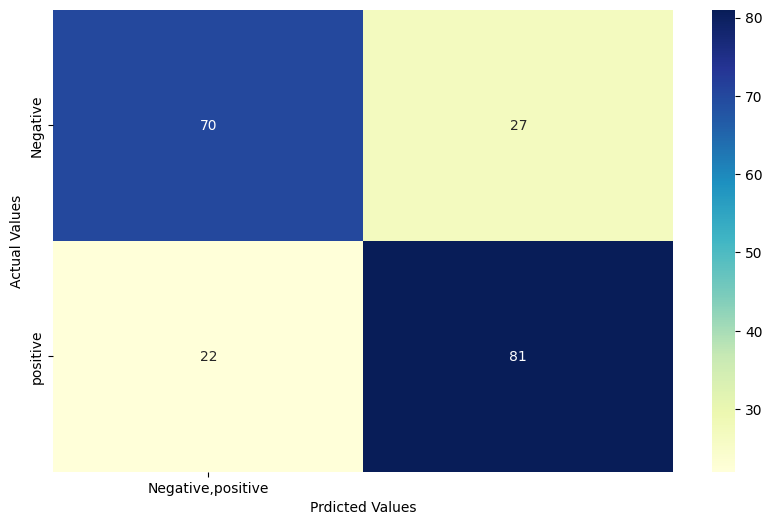

In [18]:
#Plotting the confusion matrix
import matplotlib.pyplot as plt #It is a graph plotting library in python
import seaborn as sns #It is a data visualization library in python
%matplotlib inline

plt.figure(figsize = (10,6))
sns.heatmap(cm,annot=True,cmap="YlGnBu",xticklabels=["Negative,positive"],yticklabels=["Negative","positive"])
plt.xlabel("Prdicted Values")
plt.ylabel("Actual Values")

In [19]:
#Hyperparameter tuning the Naive Bayes classifier
from nltk.tag.api import accuracy
best_accuracy = 0.0
alpha_val = 0.0
for i in np.arange(0.1,1.1,0.1):
  temp_classifier = MultinomialNB(alpha=i)
  temp_classifier.fit (x_train,y_train)
  temp_y_pred = temp_classifier.predict(x_test)
  score = accuracy_score(y_test,temp_y_pred)
  print("Accuracy score for alpha = {} is : {}%".format(round(i,1),round(score*200,2)))
  if score>best_accuracy:
    best_accuracy = score
    alpha_val = i
print("---------------------------")
print("The best accuracy is{}% with alpha value as {} ".format(round(best_accuracy*100,2),round(alpha_val,1)))


Accuracy score for alpha = 0.1 is : 155.0%
Accuracy score for alpha = 0.2 is : 156.0%
Accuracy score for alpha = 0.3 is : 155.0%
Accuracy score for alpha = 0.4 is : 155.0%
Accuracy score for alpha = 0.5 is : 153.0%
Accuracy score for alpha = 0.6 is : 153.0%
Accuracy score for alpha = 0.7 is : 153.0%
Accuracy score for alpha = 0.8 is : 151.0%
Accuracy score for alpha = 0.9 is : 151.0%
Accuracy score for alpha = 1.0 is : 151.0%
---------------------------
The best accuracy is78.0% with alpha value as 0.2 


In [20]:
classifier = MultinomialNB(alpha = 0.2)
classifier.fit(x_train,y_train)


MultinomialNB(alpha=0.2)

In [21]:
def predict_sentiment(sample_review):
  sample_review = re.sub(pattern = '[^a-zA-Z]',repl=' ',string=sample_review)
  sample_review = sample_review.lower()
  sample_review_words = sample_review.split()
  sample_review_words = [word for word in sample_review_words if not word in set(stopwords.words("english"))]
  ps=PorterStemmer()
  final_review = [ps.stem(word) for word in sample_review_words]
  final_review = ' '.join(final_review)

  temp = cv.transform([final_review]).toarray()
  return classifier.predict(temp)

In [22]:
#Predicted value
sample_review = 'quit disappoint although blame need place door'

if predict_sentiment(sample_review):
  print("This is a Positive review")
else:
  print("This is a Negative review")


This is a Negative review


In [23]:
#Predicted value
sample_review = 'disappoint'

if predict_sentiment(sample_review):
  print("This is a Positive review")
else:
  print("This is a Negative review")


This is a Negative review


In [24]:
#Predicted value
sample_review = 'The food wad absolutely wonderful, from preparation to presentation, very pleasing'

if predict_sentiment(sample_review):
  print("This is a Positive review")
else:
  print("This is a Negative review")


This is a Positive review


In [25]:
#Predicted value
sample_review = 'friendli staff'

if predict_sentiment(sample_review):
  print("This is a Positive review")
else:
  print("This is a Negative review")

This is a Positive review
